In [5]:
from sdtw import SoftDTW
from sdtw.distance import SquaredEuclidean
import numpy as np
import matplotlib.pylab as plt
from sdtw.dataset import load_ucr
from sdtw.barycenter import sdtw_barycenter

## soft-dtw and Experiment


In [10]:
debug = False

In [2]:
def calc_sdtw(dm):
    sdtw = SoftDTW(dm, gamma=1.0)
    # V is the of block R(m,n) where R is the soft-dtw matrix calculated using the Distance matrix 
    V = sdtw.compute()
    # E is the gradient of R i.e the soft-dtw matrix based on D i.e distance matrix
    E = sdtw.grad()
    # jocobian product is the product of jcobian matrix of dm regarding input X (target trajectory that will be manipulate)
    # and E, so we know that how each element in input X should be vaired to make the output V smaller
    Z = dm.jacobian_product(E)
    
    return V, E, Z

In [8]:
def ucr_Data_handler(f):
    X_tr, y_tr, X_te, y_te = load_ucr(f)
    n = 10
    # Pick n time series at random from the same class.
    rng = np.random.RandomState(0)
    classes = np.unique(y_tr)
    k = rng.randint(len(classes))
    X = X_tr[y_tr == classes[k]]
    X = X[rng.permutation(len(X))[:n]]
    return X
    

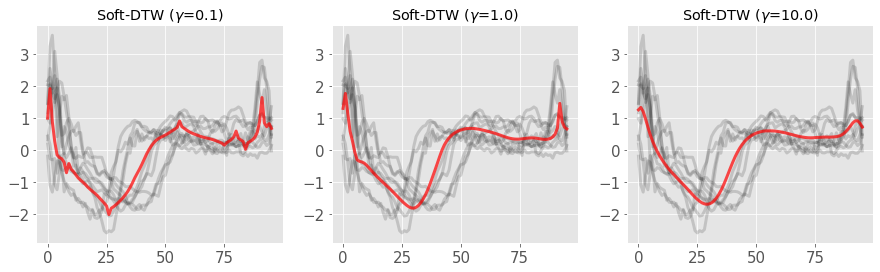

In [12]:
# barycenter experiment
X = ucr_Data_handler("ECG200")
if debug:
    print("handler output X.shape:",X.shape)
plt.style.use('ggplot')
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15



fig = plt.figure(figsize=(15,4))

barycenter_init = sum(X) / len(X)

fig_pos = 131

for gamma in (0.1, 1, 10):
    ax = fig.add_subplot(fig_pos)

    for x in X:
        ax.plot(x.ravel(), c="k", linewidth=3, alpha=0.15)
    if debug:
        print("input X: ", X.shape ,"input barycenter_init", barycenter_init.shape)
    Z = sdtw_barycenter(X, barycenter_init, gamma=gamma)
    if debug:
        print("output Z: ", Z.shape)
    ax.plot(Z.ravel(), c="r", linewidth=3, alpha=0.7)
    ax.set_title(r"Soft-DTW ($\gamma$=%0.1f)" % gamma)

    fig_pos += 1

plt.show()


## Temperal regularization of soft-dtw
Temperal regularization are suppose to help back tracking in soft-dtw to obtain untrivial result. Can not test on yet because the encoder in the essay are not avaliable and should be build on, here is the discription:

We use ResNet-50 [25] as our backbone network and ex- tract features from the output of the Conv4c layer. The ex- tracted features have dimensions of 14×14×1024. We then stack k context frame features along the temporal dimen- sion for each frame. Next, the combined features are passed through two 3D convolutional layers for aggregating tem- poral information. It is then followed by a 3D global max pooling layer, two fully-connected layers, and a linear pro- jection layer to output embedding frames, with each having 128 dimensions. We resize input video frames to 224 × 224 before feeding to our encoder network.

In [ ]:
# TODO: Need auto encoder 
# time regularization code that we can not test on yet... we
def calc_SSM(a,b):
    result = np.zeros((a.shape[0],b.shape[0]))
    for i in range(a.shape[0]):
        current = a[i]
        for j in range(b.shape[0]):
            result[i][j] = np.square(np.linalg.norm(current - b[j]))
    return result

def calc_idm(a,b, sigma= 1, romita = 0):
    nresult = 0
    result = np.zeros((a.shape[0],b.shape[0]))
    for i in range(a.shape[0]):
        current = a[i]
        for j in range(b.shape[0]):
            yij = 1 if np.absolute(i - j) > sigma else 0
            dx = np.square(np.linalg.norm(current - b[j]))
            current_idm = (i-j)*(i-j) + 1
            result[i][j] = yij * current_idm * np.maximum(0,romita - dx) + (1 - yij)*current_idm * dx
            nresult += result[i][j]
    return result, nresult





X = np.array([[1,2,3,4], [4,5,6,9],[7,8,9,15]])
# parametric curve representation
1, 2, 3, 4, 5
5
6
7
8
Y = np.array([[1,2,3,45], [4,5,6,78],[7,8,9,66], [9,10,15,25]])
a, am = cost_pipeline(X,Y)
print(a)
print(am)



# sdtw = SoftDTW(D, gamma=1.0)
# # soft-DTW discrepancy, approaches DTW as gamma -> 0
# value = sdtw.compute()
# # gradient w.r.t. D, shape = [m, n], which is also the expected alignment matrix
# E = sdtw.grad()
# # gradient w.r.t. X, shape = [m, d]
# # G = D.jacobian_product(E)
# print(E)
# # print(G)
